# Pengenalan Wajah dengan Deepface

#Pendahuluan

Deepface adalah suatu framework untuk pengenalan wajah (face recognition) yang
membungkus state-of-the-art model-model pengenalan wajah yang telah dikembangkan
sebelumnya seperti VGG-face, Google FaceNet, OpenFace, Facebook Deepface, DeepID,
ArcFace dan Dlib. Pada tugas ini anda akan mengeksplorasi Deepface Library sehingga
mendapatkan prosedur dan konfigurasi terbaik untuk task pengenalan wajah.

## Menginstal library Deepface

Untuk menggunakan Deepface terlebih dahulu menginstall library Deepface sebagai berikut:

In [12]:
!pip install deepface
from deepface import DeepFace

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 2.3 MB 11.0 MB/s 
     |████████████████████████████████| 60.5 MB 1.3 MB/s 
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 462 kB 41.8 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=6eb8bf5f8da3818adfabcfbca7be25d2a3cdfa0de8943f028820214e464ee4ad
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have im

## Menyiapkan sample dataset

Menyiapkan foto-foto yang akan digunakan sebagai database referensi dan data pengujian. Data pengujian terdiri dari data tes anggota kelas dan bukan anggota kelas. Sample dataset dapat disimpan di GDrive, cara mengaksesnya sebagai berikut: 

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Berikut sample gambar yang digunakan:

In [14]:
import glob
import os

img_anggota_path = 'drive/MyDrive/dataset/test_data_anggota/'
img_non_anggota_path = 'drive/MyDrive/dataset/test_data_non_anggota/'
img_database_path = 'drive/MyDrive/dataset/database/'
ext = ['jpeg', 'jpg', 'jfif', 'png']

files_test_anggota = []
files_test_non_anggota = []
files_database = []
[files_test_anggota.extend(glob.glob(img_anggota_path + '*.' + e)) for e in ext]
[files_test_non_anggota.extend(glob.glob(img_non_anggota_path + '*.' + e)) for e in ext]
[files_database.extend(glob.glob(img_database_path + '*.' + e)) for e in ext]


print('------------- gambar tes anggota -----------------')
counter = 0;
for img_test in files_test_anggota:
  counter = counter + 1;
  print(str(counter) + '  ' + img_test)

print('------------- gambar tes non anggota -----------------')
counter = 0;
for img_test in files_test_non_anggota:
  counter = counter + 1;
  print(str(counter) + '  ' + img_test)

print('------------- gambar database -----------------')
counter = 0;
for img_db in files_database:
  counter = counter + 1;
  print(str(counter) + '  ' + img_db)


------------- gambar tes anggota -----------------
1  drive/MyDrive/dataset/test_data_anggota/Adiyasa nurfalah-2.jpeg
2  drive/MyDrive/dataset/test_data_anggota/Adiyasa nurfalah-3.jpeg
3  drive/MyDrive/dataset/test_data_anggota/Rahman Indra Kesuma.jpeg
4  drive/MyDrive/dataset/test_data_anggota/Riyanto riyanto3.jpeg
5  drive/MyDrive/dataset/test_data_anggota/Lathifah arief.jpeg
6  drive/MyDrive/dataset/test_data_anggota/Riyanto riyanto.jpeg
7  drive/MyDrive/dataset/test_data_anggota/Rahman Indra Kesuma(3).jpeg
8  drive/MyDrive/dataset/test_data_anggota/Arief sartono 14.jpg
9  drive/MyDrive/dataset/test_data_anggota/Arief sartono 13.jpg
10  drive/MyDrive/dataset/test_data_anggota/Arief sartono 10.jpg
11  drive/MyDrive/dataset/test_data_anggota/Arief sartono 16.jpg
12  drive/MyDrive/dataset/test_data_anggota/Arief sartono 11.jpg
13  drive/MyDrive/dataset/test_data_anggota/Arief sartono 15.jpg
14  drive/MyDrive/dataset/test_data_anggota/Adiyasa nurfalah-2.jpg
15  drive/MyDrive/dataset/tes

## Verifikasi Wajah

Untuk membandingkan kesamaan dua wajah dilakukan dengan menginput dua gambar yang akan dibandingkan.

In [26]:
img1_path = 'drive/MyDrive/dataset/test_data_anggota/Adiyasa nurfalah-2.jpeg'
img2_path = 'drive/MyDrive/dataset/database/Adiyasa nurfalah.jpeg'

df = DeepFace.verify(img1_path, img2_path)

if df['verified'] == True:
  print('Hasil: Wajah yang sama')
else:
  print('Hasil: Wajah yang beda')

Hasil: Wajah yang sama


In [27]:
img1_path = 'drive/MyDrive/dataset/test_data_non_anggota/Raditya Dika 003.jpeg'
img2_path = 'drive/MyDrive/dataset/database/Riyanto riyanto2.jpeg'

df = DeepFace.verify(img1_path, img2_path)

if df['verified'] == True:
  print('Hasil: Wajah yang sama')
else:
  print('Hasil: Wajah yang beda')

Hasil: Wajah yang beda


## Pengenalan Wajah

Pada Deepface pengenalan wajah melakukan pencarian gambar yang tersimpan dalam folder database yang berisi kumpulan gambar referensi.

In [17]:
img_path = 'drive/MyDrive/dataset/test_data_anggota/Arief sartono 10.jpg'

df = DeepFace.find(img_path, db_path = img_database_path)
print('Gambar yang mirip: ' + df.iloc[0,0])


There are  12  representations found in  representations_vgg_face.pkl
find function lasts  7.6937103271484375  seconds
Gambar yang mirip: drive/MyDrive/dataset/database//Arief Sartono.jpg


Selain dengan cara seperti di atas, dapat juga dilakukan dengan mencari jarak yang paling dekat terhadap gambar-gambar yang ada di database. Berikut contohnya:

In [18]:
def cari_kesamaan_gambar(img_test, files_database):
    
    ret = 'tidak ditemukan';
    min_val = 1;
    for img_db in files_database:

        df = DeepFace.verify(img1_path = img_test, img2_path = img_db)
        d = df['distance']

        if df['verified'] == True:
          if d < min_val:
            min_val = d;
            ret = os.path.basename(img_db)

        if df['verified'] == True:
          print(os.path.basename(img_test) + ' ' + os.path.basename(img_db) + ', Jarak: ' + str(df['distance']))
        else:
          print(os.path.basename(img_test) + ' ' + os.path.basename(img_db) + ', Jarak: ' + str(df['distance']))

    return ret


img_test = files_test_anggota[0]
ret = cari_kesamaan_gambar(img_test, files_database)
print('----------------------------------------------------------------------------')
print('Gambar ' + os.path.basename(img_test) + ' paling mendekati dengan: ' + str(ret))


Adiyasa nurfalah-2.jpeg Adiyasa nurfalah.jpeg, Jarak: 0.1845578692533667
Adiyasa nurfalah-2.jpeg Riyanto riyanto2.jpeg, Jarak: 0.32797312843480353
Adiyasa nurfalah-2.jpeg Kemas Muhammad Irsan Riza (1).jpeg, Jarak: 0.26328849099175566
Adiyasa nurfalah-2.jpeg Muhammad Khaerul Naim 3.jpg, Jarak: 0.35967998023713
Adiyasa nurfalah-2.jpeg Meredita susanty.jpg, Jarak: 0.6735942574397717
Adiyasa nurfalah-2.jpeg Yaya Setiyadi_1.jpg, Jarak: 0.2350044404773035
Adiyasa nurfalah-2.jpeg Meza Silvana.jpg, Jarak: 0.39550654242280703
Adiyasa nurfalah-2.jpeg Varuliantor Dear.jpg, Jarak: 0.2609275262964671
Adiyasa nurfalah-2.jpeg Mina Ismu Rahayu(1).jpg, Jarak: 0.3800541719045414
Adiyasa nurfalah-2.jpeg Handoko supeno-_2_.jpg, Jarak: 0.32496067876887513
Adiyasa nurfalah-2.jpeg Reza Budiawan(1).jpg, Jarak: 0.44408465710739353
Adiyasa nurfalah-2.jpeg Arief Sartono.jpg, Jarak: 0.3656540549186218
Adiyasa nurfalah-2.jpeg Dewi tresnawati.jpg, Jarak: 0.46865269781178354
Adiyasa nurfalah-2.jpeg Baud Prananto6.jp

## Menghitung Akurasi

Perhitungan akurasi dilakukan terhadap data tes gambar yang termasuk anggota kelas dan gambar bukan anggota kelas. Berikut cara menghitungnya:

Akurasi anggota kelas:

In [78]:
jumlah_benar_anggota = 0
jumlah_total_anggota = 0
counter = 0;

N = len(files_test_anggota)
for img_test in files_test_anggota:
  counter = counter + 1
  df = DeepFace.find(img_test, img_database_path, silent = True, enforce_detection = False)
  if df.empty:
    print(str(counter) + '/' + str(N) + ' ' + os.path.basename(img_test) + ' - Terdeteksi: unknown (Salah)')
  else:   
    img_inp = os.path.basename(img_test).split(' ');
    img_out = os.path.basename(df.iloc[0,0]).split(' ');
    if img_inp[0] == img_out[0]:  
      jumlah_benar_anggota = jumlah_benar_anggota + 1;  
      print(str(counter) + '/' + str(N) + ' ' + os.path.basename(img_test) + ' - Terdeteksi: ' + os.path.basename(df.iloc[0,0]) + ' (Benar)')
    else:
      print(str(counter) + '/' + str(N) + ' ' + os.path.basename(img_test) + ' - Terdeteksi: ' + os.path.basename(df.iloc[0,0])+ ' (Salah)')

  jumlah_total_anggota = jumlah_total_anggota + 1;

akurasi_anggota = 100 * jumlah_benar_anggota / jumlah_total_anggota;
print('----------------------------------------');
print('Akurasi Anggota: ' + str(akurasi_anggota));


1/52 Adiyasa nurfalah-2.jpeg - Terdeteksi: Yaya Setiyadi_1.jpg (Salah)
2/52 Adiyasa nurfalah-3.jpeg - Terdeteksi: Baud Prananto6.jpg (Salah)
3/52 Rahman Indra Kesuma.jpeg - Terdeteksi: Yaya Setiyadi_1.jpg (Salah)
4/52 Riyanto riyanto3.jpeg - Terdeteksi: Reza Budiawan(1).jpg (Salah)
5/52 Lathifah arief.jpeg - Terdeteksi: Dewi tresnawati.jpg (Salah)
6/52 Riyanto riyanto.jpeg - Terdeteksi: Handoko supeno-_2_.jpg (Salah)
7/52 Rahman Indra Kesuma(3).jpeg - Terdeteksi: unknown (Salah)
8/52 Arief sartono 14.jpg - Terdeteksi: Yaya Setiyadi_1.jpg (Salah)
9/52 Arief sartono 13.jpg - Terdeteksi: unknown (Salah)
10/52 Arief sartono 10.jpg - Terdeteksi: Arief Sartono.jpg (Benar)
11/52 Arief sartono 16.jpg - Terdeteksi: Arief Sartono.jpg (Benar)
12/52 Arief sartono 11.jpg - Terdeteksi: Arief Sartono.jpg (Benar)
13/52 Arief sartono 15.jpg - Terdeteksi: Arief Sartono.jpg (Benar)
14/52 Adiyasa nurfalah-2.jpg - Terdeteksi: Yaya Setiyadi_1.jpg (Salah)
15/52 Arief sartono 12.jpg - Terdeteksi: Arief Sarton

Akurasi bukan anggota kelas:

In [79]:
jumlah_benar_non = 0
jumlah_total_non = 0
counter = 0;

N = len(files_test_non_anggota)
for img_test in files_test_non_anggota:
  counter = counter + 1
  df = DeepFace.find(img_test, img_database_path, silent = True, enforce_detection = False)
  if df.empty:
    jumlah_benar_non = jumlah_benar_non + 1; 
    print(str(counter) + '/' + str(N) + ' ' + os.path.basename(img_test) + ' - Terdeteksi: unknown (Benar)')
  else:    
    print(str(counter) + '/' + str(N) + ' ' + os.path.basename(img_test) + ' - Terdeteksi: ' + os.path.basename(df.iloc[0,0])+ ' (Salah)')
  
  jumlah_total_non = jumlah_total_non + 1;

akurasi_non = 100 * jumlah_benar_non / jumlah_total_non;
print('----------------------------------------');
print('Akurasi Non Anggota: ' + str(akurasi_non));


1/51 Raditya Dika 003.jpeg - Terdeteksi: Baud Prananto6.jpg (Salah)
2/51 Johnny Depp 001.jpeg - Terdeteksi: unknown (Benar)
3/51 gozali.jpeg - Terdeteksi: Dewi tresnawati.jpg (Salah)
4/51 Chicco Jerikho 002.jpeg - Terdeteksi: Handoko supeno-_2_.jpg (Salah)
5/51 Chicco Jerikho 001.jpeg - Terdeteksi: Meza Silvana.jpg (Salah)
6/51 Benedict Cumberbatch 001.jpeg - Terdeteksi: unknown (Benar)
7/51 Benedict Cumberbatch 002.jpeg - Terdeteksi: unknown (Benar)
8/51 Arkhana 002.jpeg - Terdeteksi: unknown (Benar)
9/51 Amber Heard 002.jpeg - Terdeteksi: unknown (Benar)
10/51 Amber Heard 003.jpeg - Terdeteksi: unknown (Benar)
11/51 Arkhana 001.jpeg - Terdeteksi: Yaya Setiyadi_1.jpg (Salah)
12/51 Amber Heard 001.jpeg - Terdeteksi: unknown (Benar)
13/51 Benedict Cumberbatch 003.jpeg - Terdeteksi: unknown (Benar)
14/51 Vladimir Putin.jpeg - Terdeteksi: unknown (Benar)
15/51 Volodymyr Zelensky.jpeg - Terdeteksi: unknown (Benar)
16/51 silas.jpeg - Terdeteksi: unknown (Benar)
17/51 Rina Nose 003.jpeg - Te

Akurasi total:

In [80]:
akurasi_total = 100 * (jumlah_benar_anggota + jumlah_benar_non) / (jumlah_total_anggota + jumlah_total_non);
print('----------------------------------------');
print('Akurasi Total: ' + str(akurasi_total));

----------------------------------------
Akurasi Total: 37.86407766990291


# Eksplorasi

Beberapa eksplorasi yang dapat dilakukan antara lain:

*   Model yang digunakan
*   Metrik yang digunakan 
*   Detektor wajah yang digunakan



In [19]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace"]
metrics = ["cosine", "euclidean", "euclidean_l2"]
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

Berikut fungsi yang dipanggil untuk menghitung akurasi:

In [20]:
def hitung_akurasi(nama_model, nama_detector, nama_metrik):
  jumlah_benar = 0
  jumlah_total = 0

  for img_test in files_test_anggota:
    df = DeepFace.find(img_test, img_database_path, model_name = nama_model, detector_backend = nama_detector, distance_metric = nama_metrik, silent = True, enforce_detection = False)
    if df.empty == False:  
      img_inp = os.path.basename(img_test).split(' ');
      img_out = os.path.basename(df.iloc[0,0]).split(' ');
      if img_inp[0] == img_out[0]:  
        jumlah_benar = jumlah_benar + 1;  
    jumlah_total = jumlah_total + 1; 

  for img_test in files_test_non_anggota:
    df = DeepFace.find(img_test, img_database_path, model_name = nama_model, detector_backend = nama_detector, distance_metric = nama_metrik, silent = True, enforce_detection = False)
    if df.empty:
      jumlah_benar = jumlah_benar + 1; 
    jumlah_total = jumlah_total + 1;
    
  akurasi = 100 * jumlah_benar / jumlah_total;
  return akurasi;

## Eksplorasi Model

Berikut adalah eksplorasi model-model Deepface dengan metrics = "cosine" dan backends detektor = "opencv".

In [21]:
import matplotlib.pyplot as plt

nama_detektor = backends[0]
nama_metrik = metrics[0]

tabel_akurasi_model = []
for model in models:
  akurasi = hitung_akurasi(model, nama_detektor, nama_metrik);
  tabel_akurasi_model.append(akurasi)
  print('Akurasi model ' + model + '  ' + str(akurasi))

plt.bar(models, tabel_akurasi_model)
plt.ylabel('Akurasi')
plt.show()


Akurasi model VGG-Face  37.86407766990291
facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 138MB/s]


Akurasi model Facenet  64.07766990291262
openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5
100%|██████████| 15.3M/15.3M [00:00<00:00, 135MB/s]


Akurasi model OpenFace  47.57281553398058
VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: /root/.deepface/weights/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|██████████| 511M/511M [00:05<00:00, 87.1MB/s]


Akurasi model DeepFace  35.922330097087375
deepid_keras_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: /root/.deepface/weights/deepid_keras_weights.h5
100%|██████████| 1.61M/1.61M [00:00<00:00, 26.7MB/s]


Akurasi model DeepID  44.66019417475728


Downloading...
From: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
To: /root/.deepface/weights/dlib_face_recognition_resnet_model_v1.dat.bz2


dlib_face_recognition_resnet_model_v1.dat is going to be downloaded


100%|██████████| 21.4M/21.4M [00:00<00:00, 28.5MB/s]


RuntimeError: ignored

## Eksplorasi Detektor Wajah

Detektor wajah sangat penting dalam pengenalan wajah, oleh karena itu detektor wajah perlu dieksplorasi untuk mendapatkan hasil terbaik.

Akurasi menggunakan detektor opencv  64.07766990291262
deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /root/.deepface/weights/deploy.prototxt
28.1kB [00:00, 18.2MB/s]                   


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /root/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel
100%|██████████| 10.7M/10.7M [00:00<00:00, 110MB/s]
Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /root/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2


Akurasi menggunakan detektor ssd  66.99029126213593
shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded


100%|██████████| 5.71M/5.71M [00:00<00:00, 14.4MB/s]


Akurasi menggunakan detektor dlib  72.81553398058253
Akurasi menggunakan detektor mtcnn  70.87378640776699
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 87.9MB/s]


Akurasi menggunakan detektor retinaface  71.84466019417475


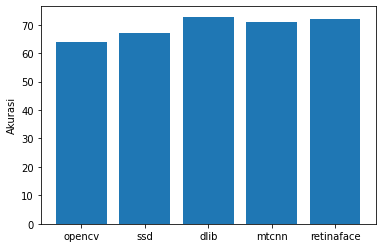

In [22]:
import matplotlib.pyplot as plt

idx_model_terbaik = tabel_akurasi_model.index(max(tabel_akurasi_model))
nama_model = models[idx_model_terbaik]

#nama_model = models[0]
nama_metrik = metrics[0]

tabel_akurasi_detektor = []
for nama_detektor in backends:
  akurasi = hitung_akurasi(nama_model, nama_detektor, nama_metrik);
  tabel_akurasi_detektor.append(akurasi)
  print('Akurasi menggunakan detektor ' + nama_detektor + '  ' + str(akurasi))

plt.bar(backends, tabel_akurasi_detektor)
plt.ylabel('Akurasi')
plt.show()


## Eksplorasi Metrik Jarak

Metrik jarak digunakan untuk mengukur kesamaan dari gambar test dengan gambar pada database. Berikut perbandingan hasil akurasi menggunakan metrik jarak yang berbeda:

Akurasi menggunakan metrik cosine  72.81553398058253
Akurasi menggunakan metrik euclidean  68.93203883495146
Akurasi menggunakan metrik euclidean_l2  70.87378640776699


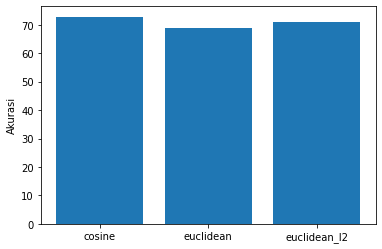

In [25]:

#id_model_terbaik = tabel_akurasi_model.index(max(tabel_akurasi_model))
#id_detektor_terbaik = tabel_akurasi_detektor.index(max(tabel_akurasi_detektor))

#nama_model = models[id_model_terbaik]
#nama_detektor = backends[id_detektor_terbaik]

nama_model = models[1]
nama_detektor = backends[2]

tabel_akurasi_metrik = []
for nama_metrik in metrics:
  akurasi = hitung_akurasi(nama_model, nama_detektor, nama_metrik);
  tabel_akurasi_metrik.append(akurasi)
  print('Akurasi menggunakan metrik ' + nama_metrik + '  ' + str(akurasi))

plt.bar(metrics, tabel_akurasi_metrik)
plt.ylabel('Akurasi')
plt.show()

# Hasil Terbaik

Berdasarkan eksplorasi yang dilakukan diperoleh konfigurasi terbaik sebagai berikut:

*   Nama model : Facenet
*   Nama detektor : dlib
*   Nama metrik: cosine

dengan akurasi 72.8%